# Linear Discriminant Analysis

Problem Statement :

Apply LDA for a dataset given in the url, build a classification model and plot the graph

Based on wine ingredients predicted customer segments, reduced
dimensions using LDA

https://drive.google.com/open?id=1a7zQj3ipKcp6jJikPv-exaTbrbbWy36x

In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np

#importing job-lib
import joblib

# importing my custom library file methods
import sys
sys.path.append('/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib')
from ipynb.fs.full.library import *

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
import collections
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# loading csv data from the file given in the url
data_set = pd.read_csv("/home/admin3/Documents/MyDoc/data_sets/Wine.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### Data-Pre Processing 

In [2]:
data_set.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [3]:
data_set.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [4]:
# counting number of output classes
collections.Counter(data_set['Customer_Segment'])

Counter({1: 59, 2: 71, 3: 48})

In [5]:
#seperating x and y values
x_values , y_values = pre_processing(data_set)

In [6]:
sc_x = StandardScaler()
x_values = sc_x.fit_transform(x_values)

In [7]:
#exporting classifier object after fitting data 
joblib.dump(sc_x,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_scalar_wine.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_scalar_wine.pkl']

In [8]:
#obtaining splitted training and test data set
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(x_values,y_values,test_size=0.2,random_state=0)

#### Applying LDA dimension reduction technique

In [9]:
lda = LDA(n_components=2)

In [10]:
train_X=lda.fit_transform(train_X,train_Y)

In [11]:
#exporting classifier object after fitting data 
joblib.dump(lda,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_wine.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_wine.pkl']

In [12]:
# looking at transformed columns which explains the original columns most
lda.explained_variance_ratio_*100

array([73.93169077, 26.06830923])

In [13]:
# transforming columns
test_X =lda.transform(test_X)

In [14]:
print(train_X.shape)
print(test_X.shape)

(142, 2)
(36, 2)


In [15]:
# #exporting classifier object after fitting data 
# joblib.dump(classifier,'/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/logical_classifier_ad.pkl')

#### Building Logistic Regression Model

In [16]:
classifier = fit_or_predict(train_X,train_Y,LogisticRegression(random_state=0),1)

In [17]:
#exporting classifier object after fitting data 
joblib.dump(classifier,'/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_classifier_wine.pkl')

['/home/admin3/ml_with_phoenix/dimensionality_reduction_techniques/pkl_objects_and_lib/lda_classifier_wine.pkl']

In [18]:
# #exporting classifier object after fitting data 
# joblib.dump(classifier,'/home/admin3/ml_with_phoenix/classification/pkl_files_and_lib/logical_classifier_ad.pkl')

#### Predicting Outputs And Checking Accuracy

In [19]:
# predicting values of test data set and storing
test_prediction = fit_or_predict(test_X,test_Y,classifier)

# predicting values of train data set and storing
train_prediction = fit_or_predict(train_X,train_Y,classifier)

In [20]:
# checking confusion matrix  to see how many values are predicted correct and incorrect
confusion_matrix(test_prediction,test_Y)

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

In [21]:
# checking confusion matrix  to see how many values are predicted correct and incorrect
confusion_matrix(train_prediction,train_Y)

array([[45,  0,  0],
       [ 0, 55,  0],
       [ 0,  0, 42]])

In [22]:
# calculating and printing accuracy score
score=accuracy_score(train_Y,train_prediction)
print("accuracy percentage  : ",score*100)

accuracy percentage  :  100.0


In [23]:
# calculating and printing accuracy score
score=accuracy_score(test_Y,test_prediction)
print("accuracy percentage  : ",score*100)

accuracy percentage  :  100.0


In [24]:
print("Classification Report Of Test Set")
print(classification_report(test_prediction,test_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Classification Report Of Train Set")
print(classification_report(train_prediction,train_Y))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

Classification Report Of Test Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Classification Report Of Train Set
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        55
           3       1.00      1.00      1.00        42

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#### Plotting Colormap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


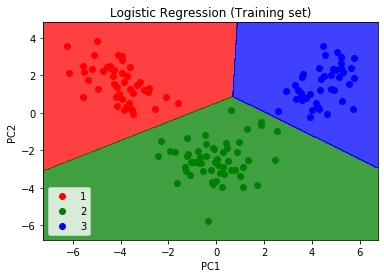

In [25]:
plot_colormap(train_X,train_Y,"Logistic Regression (Training set)",classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


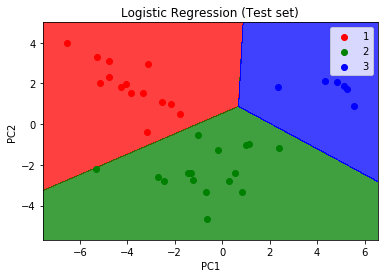

In [26]:
plot_colormap(test_X,test_Y,"Logistic Regression (Test set)",classifier)